In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ls


sample_data/


# New Section

In [8]:
from google.colab import drive
drive.mount('/content/drive')
data_dir='/content/drive/My Drive/9z_ML_Bootcamp/KNN/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
data_dir='/content/drive/My Drive/9z_ML_Bootcamp/KNN/'

def load_data(data_dir, train_row):
    train=pd.read_csv(data_dir+'train.csv')
    print(train.shape)
    # label x0, x1.. create the pic to 783x783 into 1 array
    X_train=train.values[:train_row, 1:]
    y_train=train.values[:train_row,0]
    
    pred=pd.read_csv(data_dir+'test.csv').values
    pred_test=pred[:train_row]
    return X_train, y_train, pred_test

train_row=500
Origin_X_train, Origin_y_train, Origin_X_test=load_data(data_dir, train_row)

(42000, 785)


In [11]:
Origin_X_train.shape

(500, 784)

In [12]:
Origin_X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

8


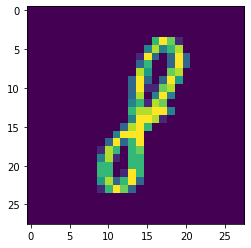

In [13]:
row=135
print(Origin_y_train[row])
plt.imshow(Origin_X_train[row].reshape(28,28))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


<function matplotlib.pyplot.show>

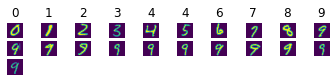

In [14]:
classes=['0','1','2','3','4','4','6','7','8','9']
rows=12
for y, cls in enumerate(classes):
    idxs=np.nonzero([i==y for i in Origin_y_train])[0]
    idxs=np.random.choice(idxs, rows)
    
    for i, idx in enumerate(idxs):
        plt_idx=i+len(classes)+y+1
        plt.subplot(rows,len(classes),plt_idx)
        plt.imshow(Origin_X_train[idx].reshape(28,28))
        plt.axis('off')
        if i ==0:
            plt.title(cls)
plt.show

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Origin_X_train, Origin_y_train, test_size=0.2, random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
k_range=range(1,9)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(confusion_matrix)
scores

<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>
<function confusion_matrix at 0x7f8432693620>


[0.75, 0.73, 0.77, 0.75, 0.76, 0.73, 0.71, 0.72]

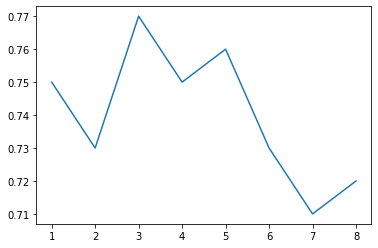

In [19]:
plt.plot(k_range,scores)

In [0]:
k=5
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(Origin_X_train, Origin_y_train)
y_pred=knn.predict(Origin_X_test[:300])

In [0]:
indx=299
print(y_pred[indx])
plt.imshow(Origin_X_train[indx].reshape(28,28))